In [1]:
import sys
sys.path.append("../")
from initial_dataSet import DataSet
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

# 1 - CICDM

In [ ]:
# CICDM

basedir = '../'
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')

for dataSet_idx in range(4):
    data_set_name = dataSet_list[dataSet_idx]
    dataSet = DataSet(basedir, data_set_name)

    read_dir=dataSet.save_result_dir

    cogn_state=np.loadtxt(read_dir+'cognitive_state.csv',delimiter=',')

    cluster=KMeans(n_clusters=4)
    cluster.fit(cogn_state)
    labels=cluster.labels_

    record=dataSet.record.reset_index()
    mean_score=record.groupby(by='user_id')['score'].mean().to_numpy()
    mean_cogn_state=cogn_state.mean(axis=1)

    sorted_clust=[]
    for clust_num in range(4):
        sorted_clust.append(mean_cogn_state[labels==clust_num].mean())
    maping=dict(zip(np.argsort(sorted_clust),range(4)))
    
    sorted_labels=np.vectorize(maping.get)(labels)

    
    data_i=pd.DataFrame({'cluster':sorted_labels,'mean score':mean_score,'mean proficiency':mean_cogn_state})
    data_i.to_csv('./output/cluster/CICDM/'+data_set_name+'_cluster.csv',index=False)

In [ ]:
# CICDM-A

basedir = '../'
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')

for dataSet_idx in range(4):
    data_set_name = dataSet_list[dataSet_idx]
    dataSet = DataSet(basedir, data_set_name)

    read_dir='./output/'+save_list[dataSet_idx]

    cogn_state=np.loadtxt(read_dir+'cognitive_state.csv',delimiter=',')

    cluster=KMeans(n_clusters=4)
    cluster.fit(cogn_state)
    labels=cluster.labels_

    record=dataSet.record.reset_index()
    mean_score=record.groupby(by='user_id')['score'].mean().to_numpy()
    mean_cogn_state=cogn_state.mean(axis=1)

    sorted_clust=[]
    for clust_num in range(4):
        sorted_clust.append(mean_cogn_state[labels==clust_num].mean())
    maping=dict(zip(np.argsort(sorted_clust),range(4)))
    
    sorted_labels=np.vectorize(maping.get)(labels)
    
    data_i=pd.DataFrame({'cluster':sorted_labels,'mean score':mean_score,'mean proficiency':mean_cogn_state})
    data_i.to_csv('./output/cluster/CICDM-A/'+data_set_name+'_cluster.csv',index=False)

In [11]:
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
models=['CICDM-A','CICDM']
model_data={}
for model in models:
    data=[]
    for dataName in dataSet_list:
        data_i=pd.read_csv('./output/cluster/'+model+'/'+dataName+'_cluster.csv')

        a=data_i.loc[:,['cluster','mean score']]
        a.columns=['cluster','mean']
        a['mean name']=['score']*len(a)

        b=data_i.loc[:,['cluster','mean proficiency']]
        b.columns=['cluster','mean']
        b['mean name']=['proficiency']*len(a)

        cat_data=pd.concat([a,b])

        data.append(cat_data)
    model_data[model]=data

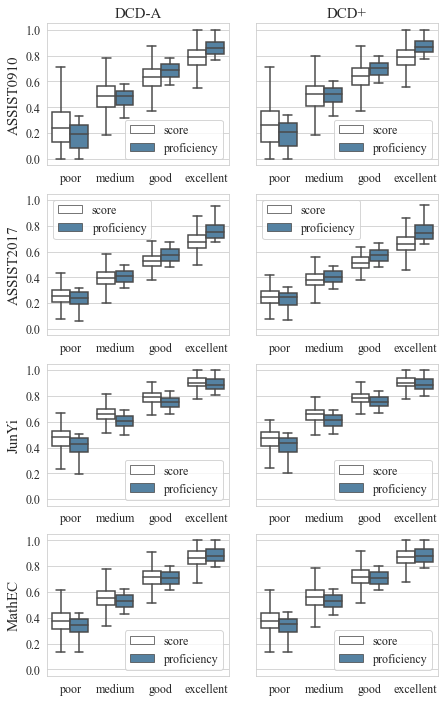

In [12]:
y_label=['ASSIST0910','ASSIST2017','JunYi','MathEC']
titles=['DCD-A','DCD+']
x_label=['poor','medium','good','excellent']
palette=['#ffffff','#4884af']

sns.set_style('whitegrid')

fig,axes = plt.subplots(4,2,sharey=True,figsize=(7,12))
plt.subplots_adjust(wspace=0.15,hspace=0.2)

for j in range(2): # 模型
    data=model_data[models[j]]
    for i in range(4): # 数据集
        sns.boxplot(x='cluster',y='mean',hue='mean name', data=data[i],orient='v',ax=axes[i,j],showfliers=False,
                    palette=palette)
        axes[i,j].legend(prop={'family':'Times New Roman', 'size': 12})
        axes[i,j].set_xlabel(None)
        axes[i,j].set_xticks([0,1,2,3])
        axes[i,j].set_xticklabels(x_label,fontdict={'family':'Times New Roman', 'size': 12})
        axes[i,j].set_yticks(np.array([0,0.2,0.4,0.6,0.8,1]))
        axes[i,j].set_yticklabels(np.array([0,0.2,0.4,0.6,0.8,1]),fontdict={'family':'Times New Roman', 'size': 12})
        if j==0:    
            axes[i,j].set_ylabel(y_label[i],fontdict={'family':'Times New Roman', 'size': 15})
        else:
            axes[i,j].set_ylabel(None)
        if i==0:
            axes[i,j].set_title(titles[j],fontdict={'family':'Times New Roman', 'size': 15})

fig.savefig('./output/mycdm_box.jpg',dpi=1200,bbox_inches='tight')  
plt.show()  

# 2 - Baseline

In [ ]:
# DINA

basedir = '../'
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')

for dataSet_idx in range(4):
    data_set_name = dataSet_list[dataSet_idx]
    dataSet = DataSet(basedir, data_set_name)

    read_dir='../Baseline/DINA/output/'+save_list[dataSet_idx]

    cogn_state=np.loadtxt(read_dir+'cognitive_state.csv',delimiter=',')

    cluster=KMeans(n_clusters=4)
    cluster.fit(cogn_state)
    labels=cluster.labels_

    record=dataSet.record.reset_index()
    mean_score=record.groupby(by='user_id')['score'].mean().to_numpy()

    mean_cogn_state=cogn_state.mean(axis=1)

    sorted_clust=[]
    for clust_num in range(4):
        sorted_clust.append(mean_cogn_state[labels==clust_num].mean())
    maping=dict(zip(np.argsort(sorted_clust),range(4)))
    
    sorted_labels=np.vectorize(maping.get)(labels)
    
    data_i=pd.DataFrame({'cluster':sorted_labels,'mean score':mean_score,'mean proficiency':mean_cogn_state})
    data_i.to_csv('./output/cluster/DINA/'+data_set_name+'_cluster.csv',index=False)

In [ ]:
# NCD

basedir = '../'
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')

for dataSet_idx in range(4):
    data_set_name = dataSet_list[dataSet_idx]
    dataSet = DataSet(basedir, data_set_name)

    read_dir='../Baseline/NCD/output/'+save_list[dataSet_idx]

    cogn_state=np.loadtxt(read_dir+'cognitive_state.csv',delimiter=',')

    cluster=KMeans(n_clusters=4)
    cluster.fit(cogn_state)
    labels=cluster.labels_

    record=dataSet.record.reset_index()
    mean_score=record.groupby(by='user_id')['score'].mean().to_numpy()

    mean_cogn_state=cogn_state.mean(axis=1)

    sorted_clust=[]
    for clust_num in range(4):
        sorted_clust.append(mean_cogn_state[labels==clust_num].mean())
    maping=dict(zip(np.argsort(sorted_clust),range(4)))
    
    sorted_labels=np.vectorize(maping.get)(labels)
    
    data_i=pd.DataFrame({'cluster':sorted_labels,'mean score':mean_score,'mean proficiency':mean_cogn_state})
    data_i.to_csv('./output/cluster/NCD/'+data_set_name+'_cluster.csv',index=False)

In [ ]:
# CDGK

basedir = '../'
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')

for dataSet_idx in range(4):
    data_set_name = dataSet_list[dataSet_idx]
    dataSet = DataSet(basedir, data_set_name)

    read_dir='../temp_Baseline/CDGK/output/'+save_list[dataSet_idx]

    cogn_state=np.loadtxt(read_dir+'cognitive_state.csv',delimiter=',')

    cluster=KMeans(n_clusters=4)
    cluster.fit(cogn_state)
    labels=cluster.labels_

    record=dataSet.record.reset_index()
    mean_score=record.groupby(by='user_id')['score'].mean().to_numpy()

    mean_cogn_state=cogn_state.mean(axis=1)

    sorted_clust=[]
    for clust_num in range(4):
        sorted_clust.append(mean_cogn_state[labels==clust_num].mean())
    maping=dict(zip(np.argsort(sorted_clust),range(4)))
    
    sorted_labels=np.vectorize(maping.get)(labels)
    
    data_i=pd.DataFrame({'cluster':sorted_labels,'mean score':mean_score,'mean proficiency':mean_cogn_state})
    data_i.to_csv('./output/cluster/CDGK/'+data_set_name+'_cluster.csv',index=False)

In [9]:
save_list = ('a0910/', 'a2017/', 'junyi/', 'math_ec/')
dataSet_list = ('ASSIST_0910', 'ASSIST_2017','JUNYI', 'MathEC')
models=['DINA','NCD','CDGK']
model_data={}
for model in models:
    data=[]
    for dataName in dataSet_list:
        data_i=pd.read_csv('./output/cluster/'+model+'/'+dataName+'_cluster.csv')

        a=data_i.loc[:,['cluster','mean score']]
        a.columns=['cluster','mean']
        a['mean name']=['score']*len(a)

        b=data_i.loc[:,['cluster','mean proficiency']]
        b.columns=['cluster','mean']
        b['mean name']=['proficiency']*len(a)

        cat_data=pd.concat([a,b])

        data.append(cat_data)
    model_data[model]=data

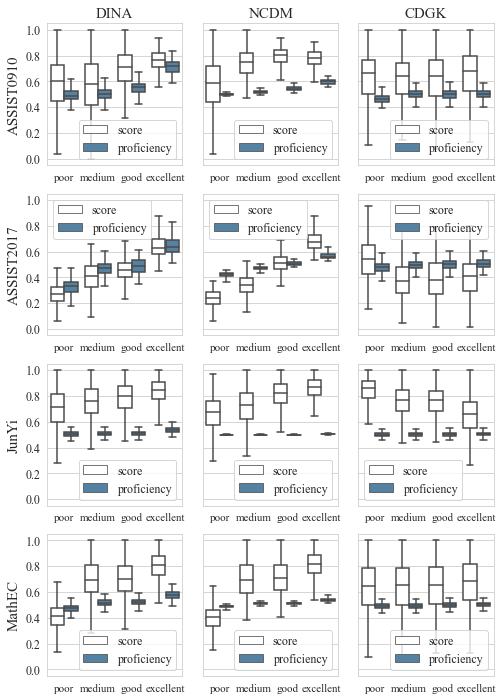

In [10]:
y_label=['ASSIST0910','ASSIST2017','JunYi','MathEC']
titles=['DINA','NCDM','CDGK']
x_label=['poor','medium','good','excellent']
palette=['#ffffff','#4884af']

sns.set_style('whitegrid')

fig,axes = plt.subplots(4,3,sharey=True,figsize=(8,12))
plt.subplots_adjust(wspace=0.15,hspace=0.2)

for j in range(3): # 模型
    data=model_data[models[j]]
    for i in range(4): # 数据集
        sns.boxplot(x='cluster',y='mean',hue='mean name', data=data[i],orient='v',ax=axes[i,j],showfliers=False,palette=palette)
        axes[i,j].legend(prop={'family':'Times New Roman', 'size': 12})
        axes[i,j].set_xlabel(None)
        axes[i,j].set_xticks(np.arange(4))
        axes[i,j].set_xticklabels(x_label,fontdict={'family':'Times New Roman', 'size': 11})
        axes[i,j].set_yticks(np.array([0,0.2,0.4,0.6,0.8,1]))
        axes[i,j].set_yticklabels(np.array([0,0.2,0.4,0.6,0.8,1]),fontdict={'family':'Times New Roman', 'size': 12})
        if j==0:    
            axes[i,j].set_ylabel(y_label[i],fontdict={'family':'Times New Roman', 'size': 15})
        else:
            axes[i,j].set_ylabel(None)
        if i==0:
            axes[i,j].set_title(titles[j],fontdict={'family':'Times New Roman', 'size': 15})

fig.savefig('./output/baseline_box.jpg',dpi=1200,bbox_inches='tight')  
plt.show()    